In [64]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
import cartopy.crs as ccrs
import astropy.constants as c
import astropy.units as u
from photutils import BoundingBox

import glob
from astropy.wcs import WCS
import shapely.geometry as sg
import shapely.ops as so
from descartes import PolygonPatch

matplotlib.rcParams.update({'font.size': 20})

In [63]:
sg.box?

Signature: sg.box(minx, miny, maxx, maxy, ccw=True)
Docstring: Returns a rectangular polygon with configurable normal vector
File:      /opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/geo.py
Type:      function


In [7]:
test = fits.open('UW1040_reg/83F010612_43_light_reg.fits')[0]

In [27]:
test.data.shape

(4250, 5750)

In [30]:
w = WCS(test.header)
sky = w.pixel_to_world(test.data.shape[0]/2, test.data.shape[1]/2)

In [37]:
sky.ra, sky.dec

(<Longitude 134.91365249 deg>, <Latitude 33.09498549 deg>)

In [48]:
fits.open('UW1040_reg/T13030365_44_light_reg.fits')[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5750                                                  
NAXIS2  =                 4250                                                  
MEDSKY  =     961.408809475002 / median sky value                               
SKY_C00 =     956.883285050206 / sky coeff                                      
SKY_C01 =   0.0469281570655018 / sky coeff                                      
SKY_C02 = -2.5778653421344E-05 / sky coeff                                      
SKY_C03 = 3.20437112608096E-09 / sky coeff                                      
SKY_C10 = -0.01043002405945402 / sky coeff                                      
SKY_C11 = -7.7517686714045E-11 / sky coeff                                      
SKY_C12 = -2.3738518095672E-

In [8]:
test.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5750                                                  
NAXIS2  =                 4250                                                  
MEDSKY  =    940.4127599068051 / median sky value                               
SKY_C00 =    946.2982638359778 / sky coeff                                      
SKY_C01 =  0.04646100754400381 / sky coeff                                      
SKY_C02 = -3.6342888958758E-05 / sky coeff                                      
SKY_C03 = 7.21649961316073E-09 / sky coeff                                      
SKY_C10 = -0.01461274496380095 / sky coeff                                      
SKY_C11 =                  0.0 / sky coeff                                      
SKY_C12 =                  0

In [149]:
g_RA = []
g_Dec = []
r_RA = []
r_Dec = []
others_ = []
others_RA = []
others_Dec = []

for i in glob.glob('UW1040_reg/*'):
#     img = fits.open(i)[0].data
    img_head = fits.open(i)[0].header
#     w = WCS(img_head)
#     sky = w.pixel_to_world(img.shape[0]/2, img.shape[1]/2)
    img_head['OBJCTDEC'] = img_head['OBJCTDEC'].replace('d', ':')
    coords = SkyCoord(img_head['OBJCTRA'], img_head['OBJCTDEC'], unit = ['hr', 'deg'])
    if img_head['FILTER'] == 'G':
        g_RA.append(coords.ra.deg)
        g_Dec.append(coords.dec.deg)
        
    if img_head['FILTER'] == 'R':
        r_RA.append(coords.ra.deg)
        r_Dec.append(coords.dec.deg)
        
    if (img_head['FILTER'] != 'G') & (img_head['FILTER'] != 'R'):
        others_.append(i)
        others_RA.append(coords.ra.deg)
        others_Dec.append(coords.dec.deg)
        print(img_head['FILTER'])

Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown


In [150]:
len(g_RA), len(r_RA)

(55, 51)

In [151]:
others_

['UW1040_reg/T13100593_45_light_reg.fits',
 'UW1040_reg/T13100593_44_light_reg.fits',
 'UW1040_reg/T13100593_43_light_reg.fits',
 'UW1040_reg/T13090564_43_light_reg.fits',
 'UW1040_reg/T13090564_44_light_reg.fits',
 'UW1040_reg/83F010692_45_light_reg.fits',
 'UW1040_reg/83F010692_44_light_reg.fits',
 'UW1040_reg/T13090564_45_light_reg.fits',
 'UW1040_reg/83F010692_43_light_reg.fits']

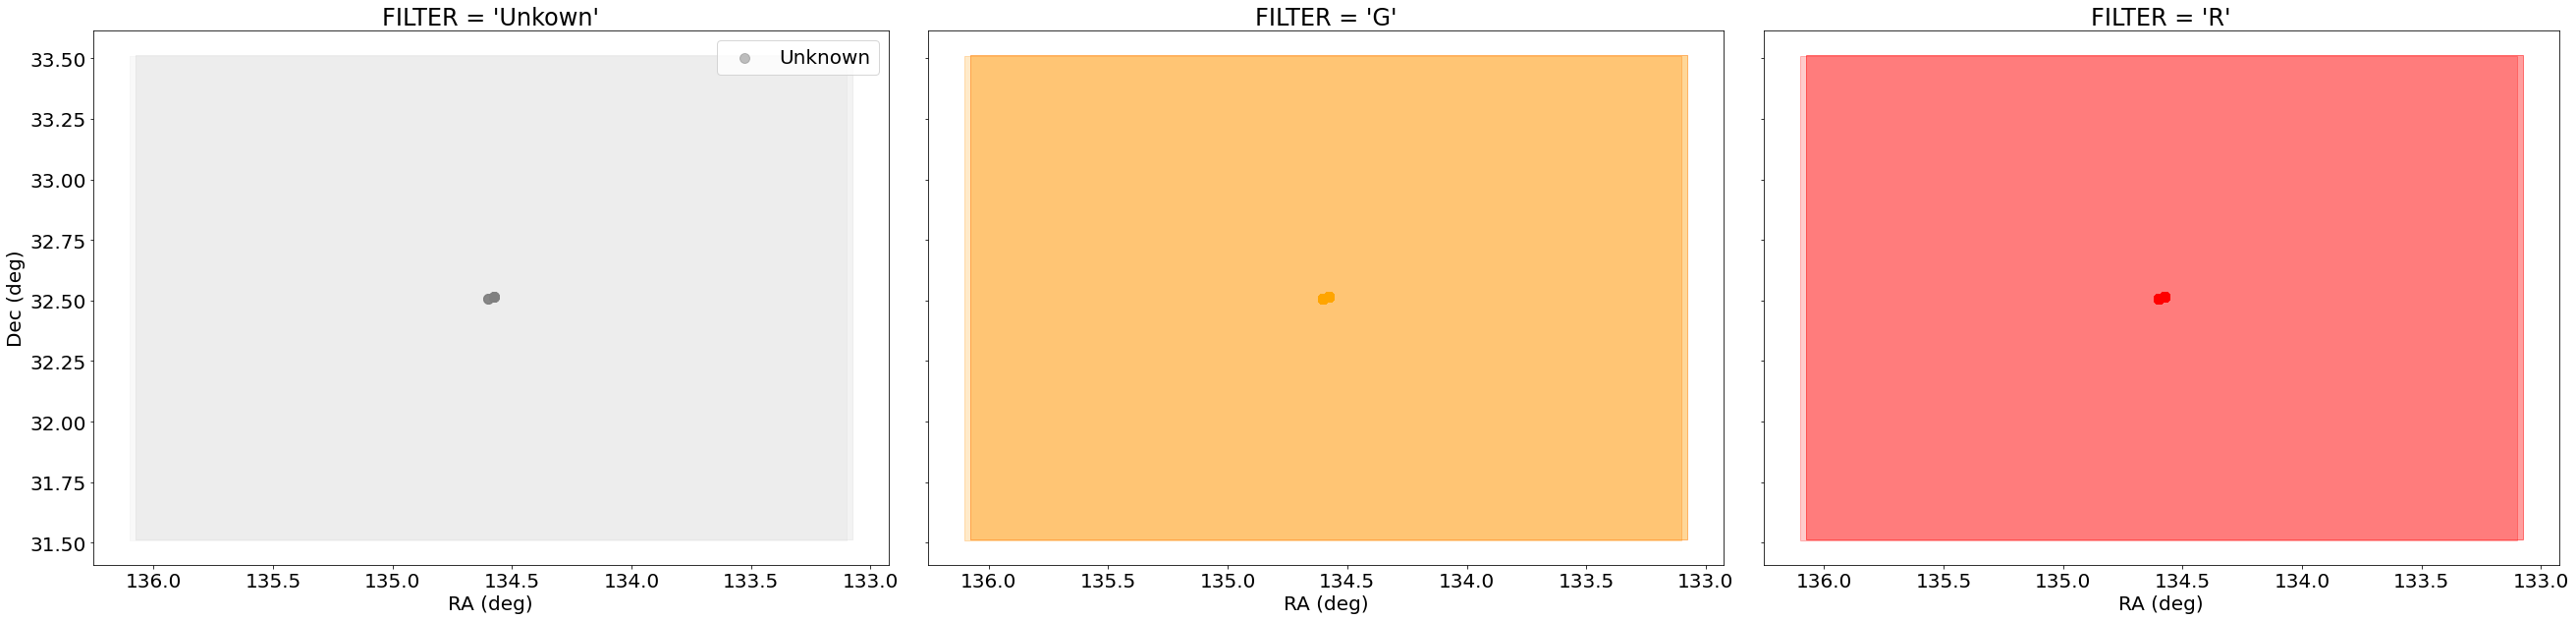

In [152]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (45, 10), sharey = True, gridspec_kw = {'wspace':0.05, 'hspace':0.05})

# for i in range(len(g_RA)):
#     ax1.add_patch(PolygonPatch(sg.box(g_RA[i]-1.5, g_Dec[i]-1, g_RA[i]+1.5, g_Dec[i]+1), fc = 'orange', ec = 'orange', alpha = 0.01))
# ax1.scatter(g_RA, g_Dec, color = 'orange', label = 'G', s = 100, alpha = 0.5)
# for i in range(len(r_RA)):
#     ax1.add_patch(PolygonPatch(sg.box(r_RA[i]-1.5, r_Dec[i]-1, r_RA[i]+1.5, r_Dec[i]+1), fc = 'red', ec = 'red', alpha = 0.01))
# ax1.scatter(r_RA, r_Dec, color = 'red', label = 'R', s = 100, alpha = 0.5)
for i in range(len(others_RA)):
    ax1.add_patch(PolygonPatch(sg.box(others_RA[i]-1.5, others_Dec[i]-1, others_RA[i]+1.5, others_Dec[i]+1), fc = 'gray', ec = 'gray', alpha = 0.01))
ax1.scatter(others_RA, others_Dec, color = 'gray', label = 'Unknown', s = 100, alpha = 0.5)
ax1.legend(loc = 'best')
ax1.set_xlabel('RA (deg)')
ax1.set_ylabel('Dec (deg)')
ax1.invert_xaxis()

for i in range(len(g_RA)):
    ax2.add_patch(PolygonPatch(sg.box(g_RA[i]-1.5, g_Dec[i]-1, g_RA[i]+1.5, g_Dec[i]+1), fc = 'orange', ec = 'orange', alpha = 0.01))
ax2.scatter(g_RA, g_Dec, color = 'orange', label = 'G', s = 100, alpha = 0.5)
ax2.set_xlabel('RA (deg)')
# ax2.set_ylabel('Dec (deg)')
ax2.invert_xaxis()

for i in range(len(r_RA)):
    ax3.add_patch(PolygonPatch(sg.box(r_RA[i]-1.5, r_Dec[i]-1, r_RA[i]+1.5, r_Dec[i]+1), fc = 'red', ec = 'red', alpha = 0.01))
ax3.scatter(r_RA, r_Dec, color = 'red', label = 'R', s = 100, alpha = 0.5)
ax3.set_xlabel('RA (deg)')
# ax3.set_ylabel('Dec (deg)')
ax3.invert_xaxis()


ax1.set_title('FILTER = \'Unkown\'')
ax2.set_title('FILTER = \'G\'')
ax3.set_title('FILTER = \'R\'')


fig.savefig('reg_img_err.png', bbox_inches = 'tight')

In [73]:
test = fits.Header.fromfile('UW1040_siphead/T13110625_43_light.head')

In [74]:
test

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3358                                                  
NAXIS2  =                 2536                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
EXPTIME =                 600. / exposure time (seconds)                        
TEMPERAT=                 -10. / temperature (C)                                
IMAGETYP= 'light   '           / image type                                     
FILTNUM =                    0                                                  
DATE    = '2019-12-01T11:25:34.000' / (YYYY-MM-DDThh:mm:ss UTC)                 
SERIALNO= 'T13110625'       

In [75]:
w = WCS(img_head)
sky = w.pixel_to_world(test['IMAGEW']/2, test['IMAGEH']/2)

In [79]:
sg.box?

Signature: sg.box(minx, miny, maxx, maxy, ccw=True)
Docstring: Returns a rectangular polygon with configurable normal vector
File:      /opt/anaconda3/lib/python3.8/site-packages/shapely/geometry/geo.py
Type:      function


In [91]:
g_RA = []
g_Dec = []
g_frames = []
r_RA = []
r_Dec = []
r_frames = []
others_ = []
others_RA = []
others_Dec = []
others_frames = []

for i in glob.glob('UW1040_siphead/*'):
    img_head = fits.Header.fromfile(i)
    w = WCS(img_head)
    sky = w.pixel_to_world(img_head['IMAGEW']/2, img_head['IMAGEH']/2)
    ul_corner = w.pixel_to_world(0, img_head['IMAGEH'])
    ll_corner = w.pixel_to_world(0, 0)
    ur_corner = w.pixel_to_world(img_head['IMAGEW'], img_head['IMAGEH'])
    lr_corner = w.pixel_to_world(img_head['IMAGEW'], 0)
    if img_head['FILTER'] == 'G':
        g_RA.append(sky.ra.deg)
        g_Dec.append(sky.dec.deg)
        g_frames.append(sg.box(ll_corner.ra.deg, ll_corner.dec.deg, ur_corner.ra.deg, ur_corner.dec.deg))
        
    if img_head['FILTER'] == 'R':
        r_RA.append(sky.ra.deg)
        r_Dec.append(sky.dec.deg)
        r_frames.append(sg.box(ll_corner.ra.deg, ll_corner.dec.deg, ur_corner.ra.deg, ur_corner.dec.deg))
        
    if (img_head['FILTER'] != 'G') & (img_head['FILTER'] != 'R'):
        others_.append(i)
        others_RA.append(sky.ra.deg)
        others_Dec.append(sky.dec.deg)
        others_frames.append(sg.box(ll_corner.ra.deg, ll_corner.dec.deg, ur_corner.ra.deg, ur_corner.dec.deg))
#         print(img_head['FILTER'])

Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown


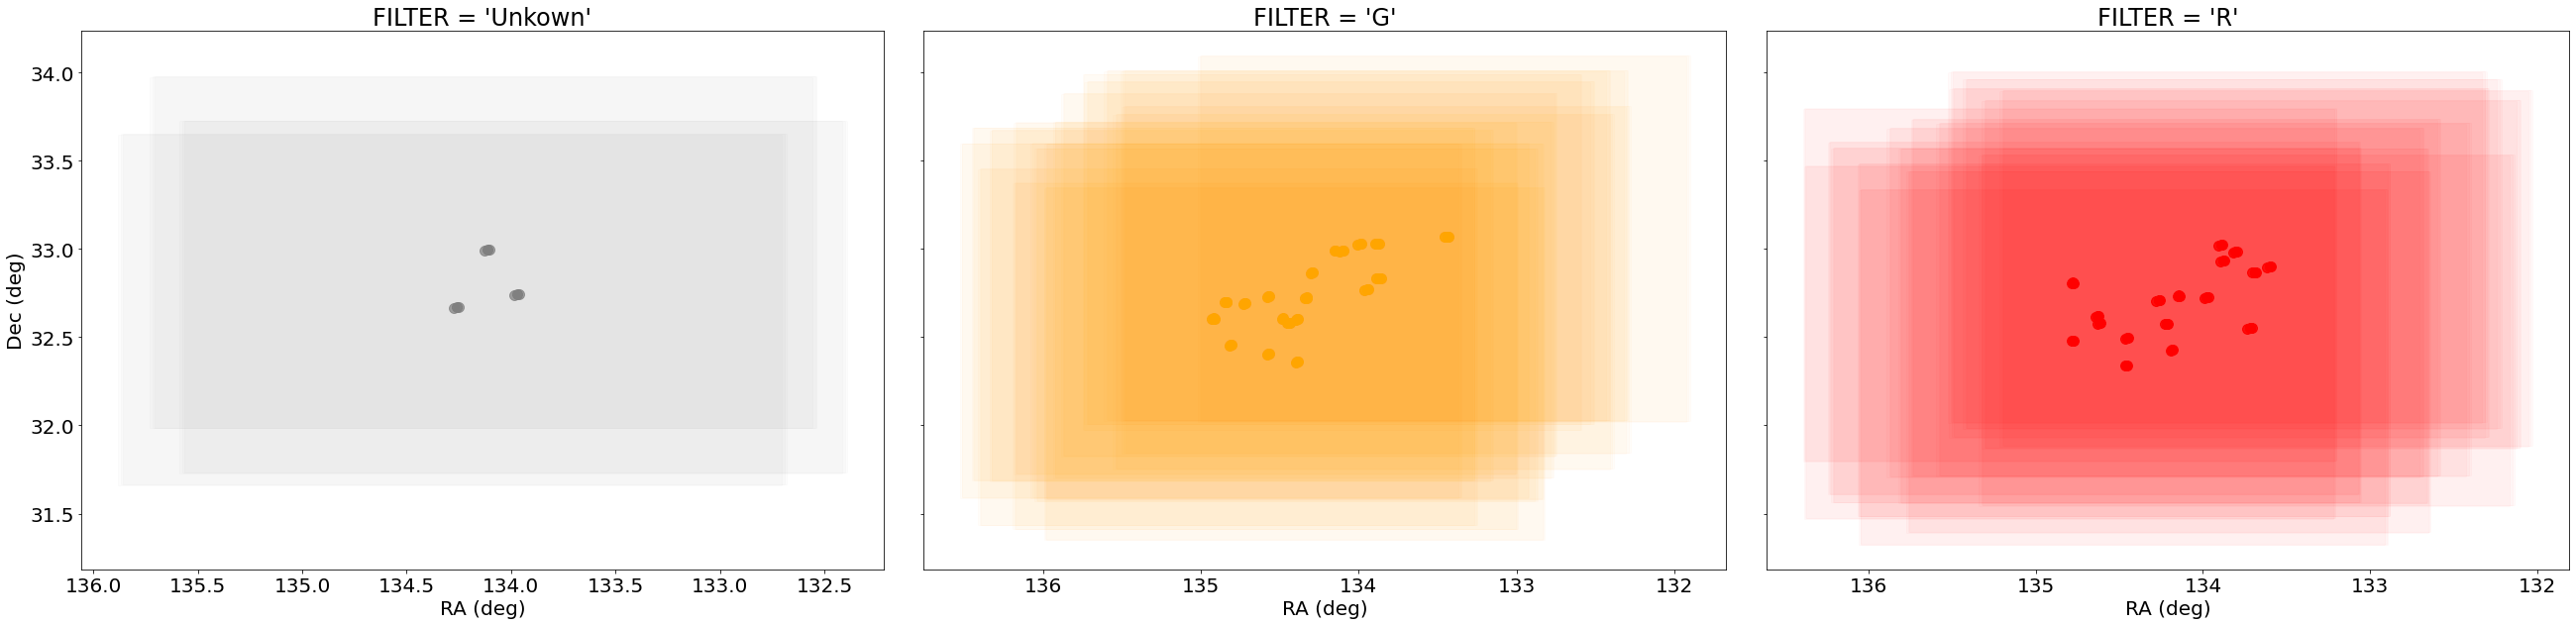

In [96]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (45, 10), sharey = True, gridspec_kw = {'wspace':0.05, 'hspace':0.05})

for i in others_frames:
    ax1.add_patch(PolygonPatch(i, fc = 'gray', ec = 'gray', alpha = 0.02))
ax1.scatter(others_RA, others_Dec, color = 'gray', label = 'Unknown', s = 100, alpha = 0.7)
# ax1.legend(loc = 'best')
ax1.set_xlabel('RA (deg)')
ax1.set_ylabel('Dec (deg)')
ax1.set_title('FILTER = \'Unkown\'')
ax1.invert_xaxis()

for i in g_frames:
    ax2.add_patch(PolygonPatch(i, fc = 'orange', ec = 'orange', alpha = 0.02))
ax2.scatter(g_RA, g_Dec, color = 'orange', label = 'G', s = 100, alpha = 0.7)
ax2.set_xlabel('RA (deg)')
ax2.set_title('FILTER = \'G\'')
# ax2.set_ylabel('Dec (deg)')
ax2.invert_xaxis()

for i in r_frames:
    ax3.add_patch(PolygonPatch(i, fc = 'red', ec = 'red', alpha = 0.02))
ax3.scatter(r_RA, r_Dec, color = 'red', label = 'R', s = 100, alpha = 0.7)
ax3.set_xlabel('RA (deg)')
ax3.set_title('FILTER = \'R\'')
# ax3.set_ylabel('Dec (deg)')
ax3.invert_xaxis()
fig.savefig('UW1040_dither.png', bbox_inches = 'tight')

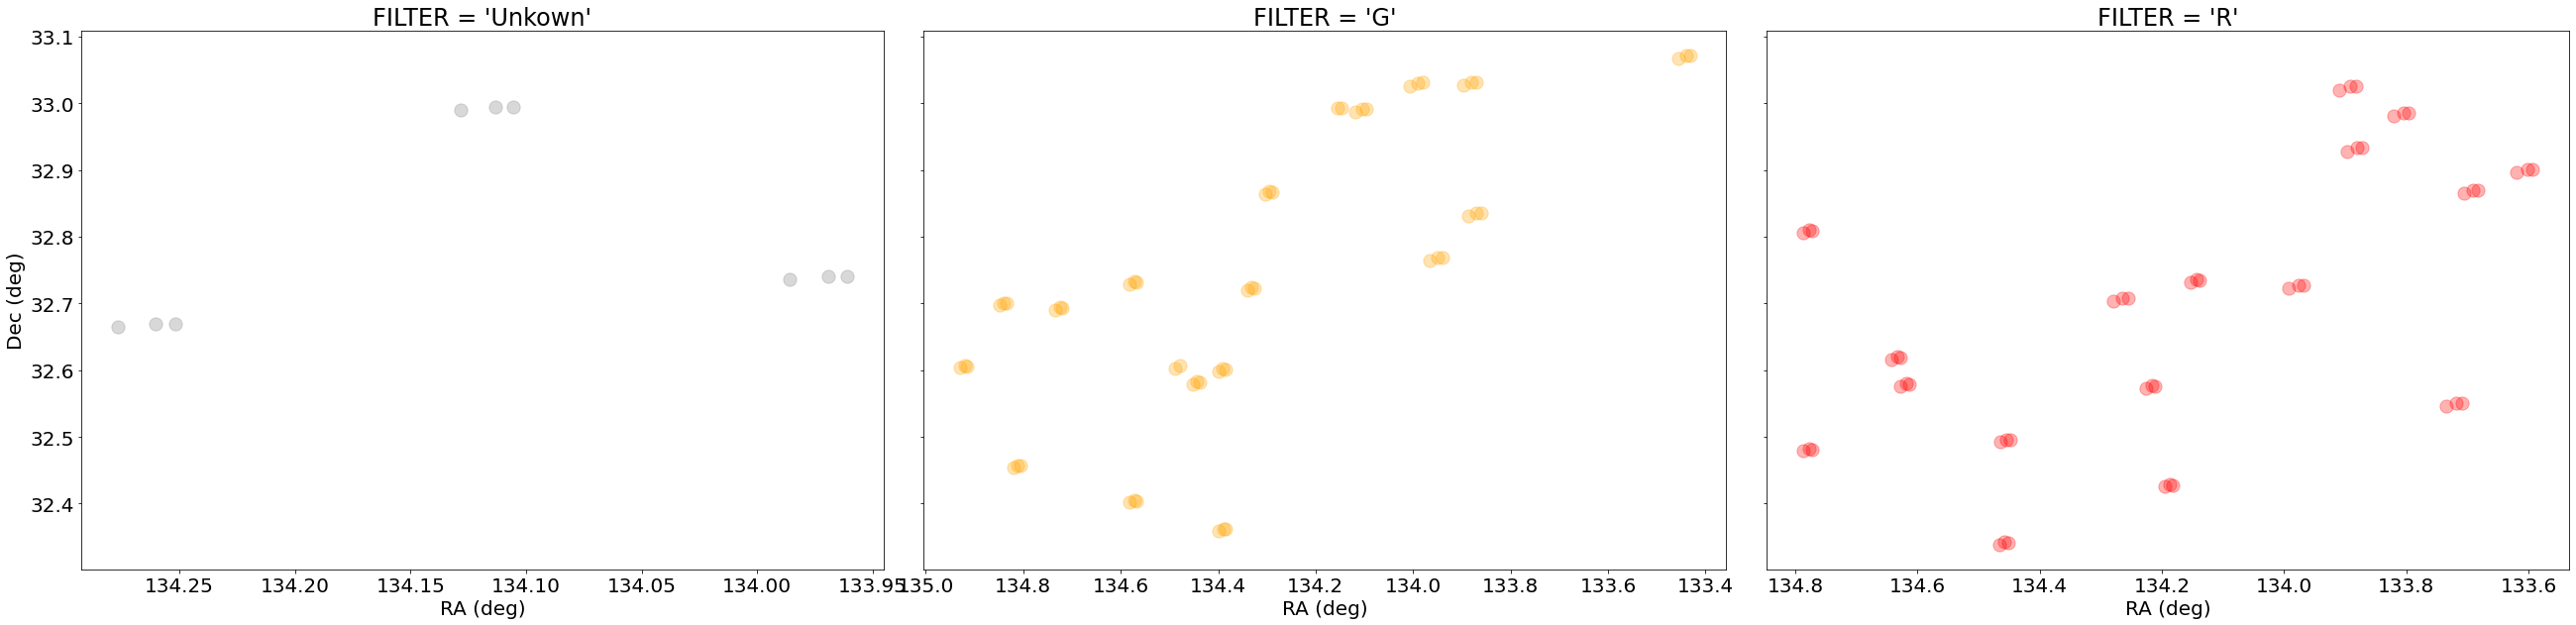

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (45, 10), sharey = True, gridspec_kw = {'wspace':0.05, 'hspace':0.05})

# for i in others_frames:
#     ax1.add_patch(PolygonPatch(i, fc = 'gray', ec = 'gray', alpha = 0.02))
ax1.scatter(others_RA, others_Dec, color = 'gray', label = 'Unknown', s = 175, alpha = 0.3)
# ax1.legend(loc = 'best')
ax1.set_xlabel('RA (deg)')
ax1.set_ylabel('Dec (deg)')
ax1.set_title('FILTER = \'Unkown\'')
ax1.invert_xaxis()

# for i in g_frames:
#     ax2.add_patch(PolygonPatch(i, fc = 'orange', ec = 'orange', alpha = 0.02))
ax2.scatter(g_RA, g_Dec, color = 'orange', label = 'G', s = 175, alpha = 0.3)
ax2.set_xlabel('RA (deg)')
ax2.set_title('FILTER = \'G\'')
# ax2.set_ylabel('Dec (deg)')
ax2.invert_xaxis()

# for i in r_frames:
#     ax3.add_patch(PolygonPatch(i, fc = 'red', ec = 'red', alpha = 0.02))
ax3.scatter(r_RA, r_Dec, color = 'red', label = 'R', s = 175, alpha = 0.3)
ax3.set_xlabel('RA (deg)')
ax3.set_title('FILTER = \'R\'')
# ax3.set_ylabel('Dec (deg)')
ax3.invert_xaxis()
fig.savefig('UW1040_dither_v2.png', bbox_inches = 'tight')

In [110]:
(glob.glob('UW1040_siphead/*')[0][:-5]).replace('siphead', 'reg')

'UW1040_reg/83F010827_44_light'

In [115]:
g_RA = []
g_Dec = []
g_reg_RA = []
g_reg_Dec = []
g_frames = []
r_RA = []
r_Dec = []
r_reg_RA = []
r_reg_Dec = []
r_frames = []
others_ = []
others_RA = []
others_Dec = []
others_reg_RA = []
others_reg_Dec = []
others_frames = []

for i in glob.glob('UW1040_siphead/*'):
    img_head = fits.Header.fromfile(i)
    w = WCS(img_head)
    sky = w.pixel_to_world(img_head['IMAGEW']/2, img_head['IMAGEH']/2)
    ul_corner = w.pixel_to_world(0, img_head['IMAGEH'])
    ll_corner = w.pixel_to_world(0, 0)
    ur_corner = w.pixel_to_world(img_head['IMAGEW'], img_head['IMAGEH'])
    lr_corner = w.pixel_to_world(img_head['IMAGEW'], 0)
    
    reg_img = fits.open((i[:-5] + '_reg.fits').replace('siphead', 'reg'))
    reg_img[0].header['OBJCTDEC'] = reg_img[0].header['OBJCTDEC'].replace('d', ':')
    reg_coords = SkyCoord(reg_img[0].header['OBJCTRA'], reg_img[0].header['OBJCTDEC'], unit = ['hr', 'deg'])
    if img_head['FILTER'] == 'G':
        g_RA.append(sky.ra.deg)
        g_Dec.append(sky.dec.deg)
        g_reg_RA.append(reg_coords.ra.deg)
        g_reg_Dec.append(reg_coords.dec.deg)
        g_frames.append(sg.box(ll_corner.ra.deg, ll_corner.dec.deg, ur_corner.ra.deg, ur_corner.dec.deg))
        
    if img_head['FILTER'] == 'R':
        r_RA.append(sky.ra.deg)
        r_Dec.append(sky.dec.deg)
        r_reg_RA.append(reg_coords.ra.deg)
        r_reg_Dec.append(reg_coords.dec.deg)
        r_frames.append(sg.box(ll_corner.ra.deg, ll_corner.dec.deg, ur_corner.ra.deg, ur_corner.dec.deg))
        
    if (img_head['FILTER'] != 'G') & (img_head['FILTER'] != 'R'):
        others_.append(i)
        others_RA.append(sky.ra.deg)
        others_Dec.append(sky.dec.deg)
        others_reg_RA.append(reg_coords.ra.deg)
        others_reg_Dec.append(reg_coords.dec.deg)
        others_frames.append(sg.box(ll_corner.ra.deg, ll_corner.dec.deg, ur_corner.ra.deg, ur_corner.dec.deg))
#         print(img_head['FILTER'])

In [119]:
np.unique(r_reg_RA)

array([134.57625   , 134.60166667])

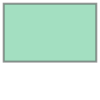

In [128]:
others_frames

In [134]:
g_reg_RA

[134.57625,
 134.57625,
 134.57625,
 134.60166666666666,
 134.57625,
 134.57625,
 134.57625,
 134.57625,
 134.60166666666666,
 134.60166666666666,
 134.57625,
 134.57625,
 134.60166666666666,
 134.60166666666666,
 134.57625,
 134.57625,
 134.60166666666666,
 134.60166666666666,
 134.60166666666666,
 134.60166666666666,
 134.60166666666666,
 134.57625,
 134.57625,
 134.60166666666666,
 134.60166666666666,
 134.57625,
 134.57625,
 134.57625,
 134.57625,
 134.57625,
 134.57625,
 134.60166666666666,
 134.60166666666666,
 134.57625,
 134.57625,
 134.57625,
 134.57625,
 134.57625,
 134.57625,
 134.60166666666666,
 134.60166666666666,
 134.57625,
 134.57625,
 134.57625,
 134.57625,
 134.57625,
 134.60166666666666,
 134.57625,
 134.57625,
 134.57625,
 134.57625,
 134.60166666666666,
 134.57625,
 134.57625,
 134.57625]

In [132]:
np.array(others_frames)[np.array(others_reg_RA) == 134.60166667]

array([], dtype=object)

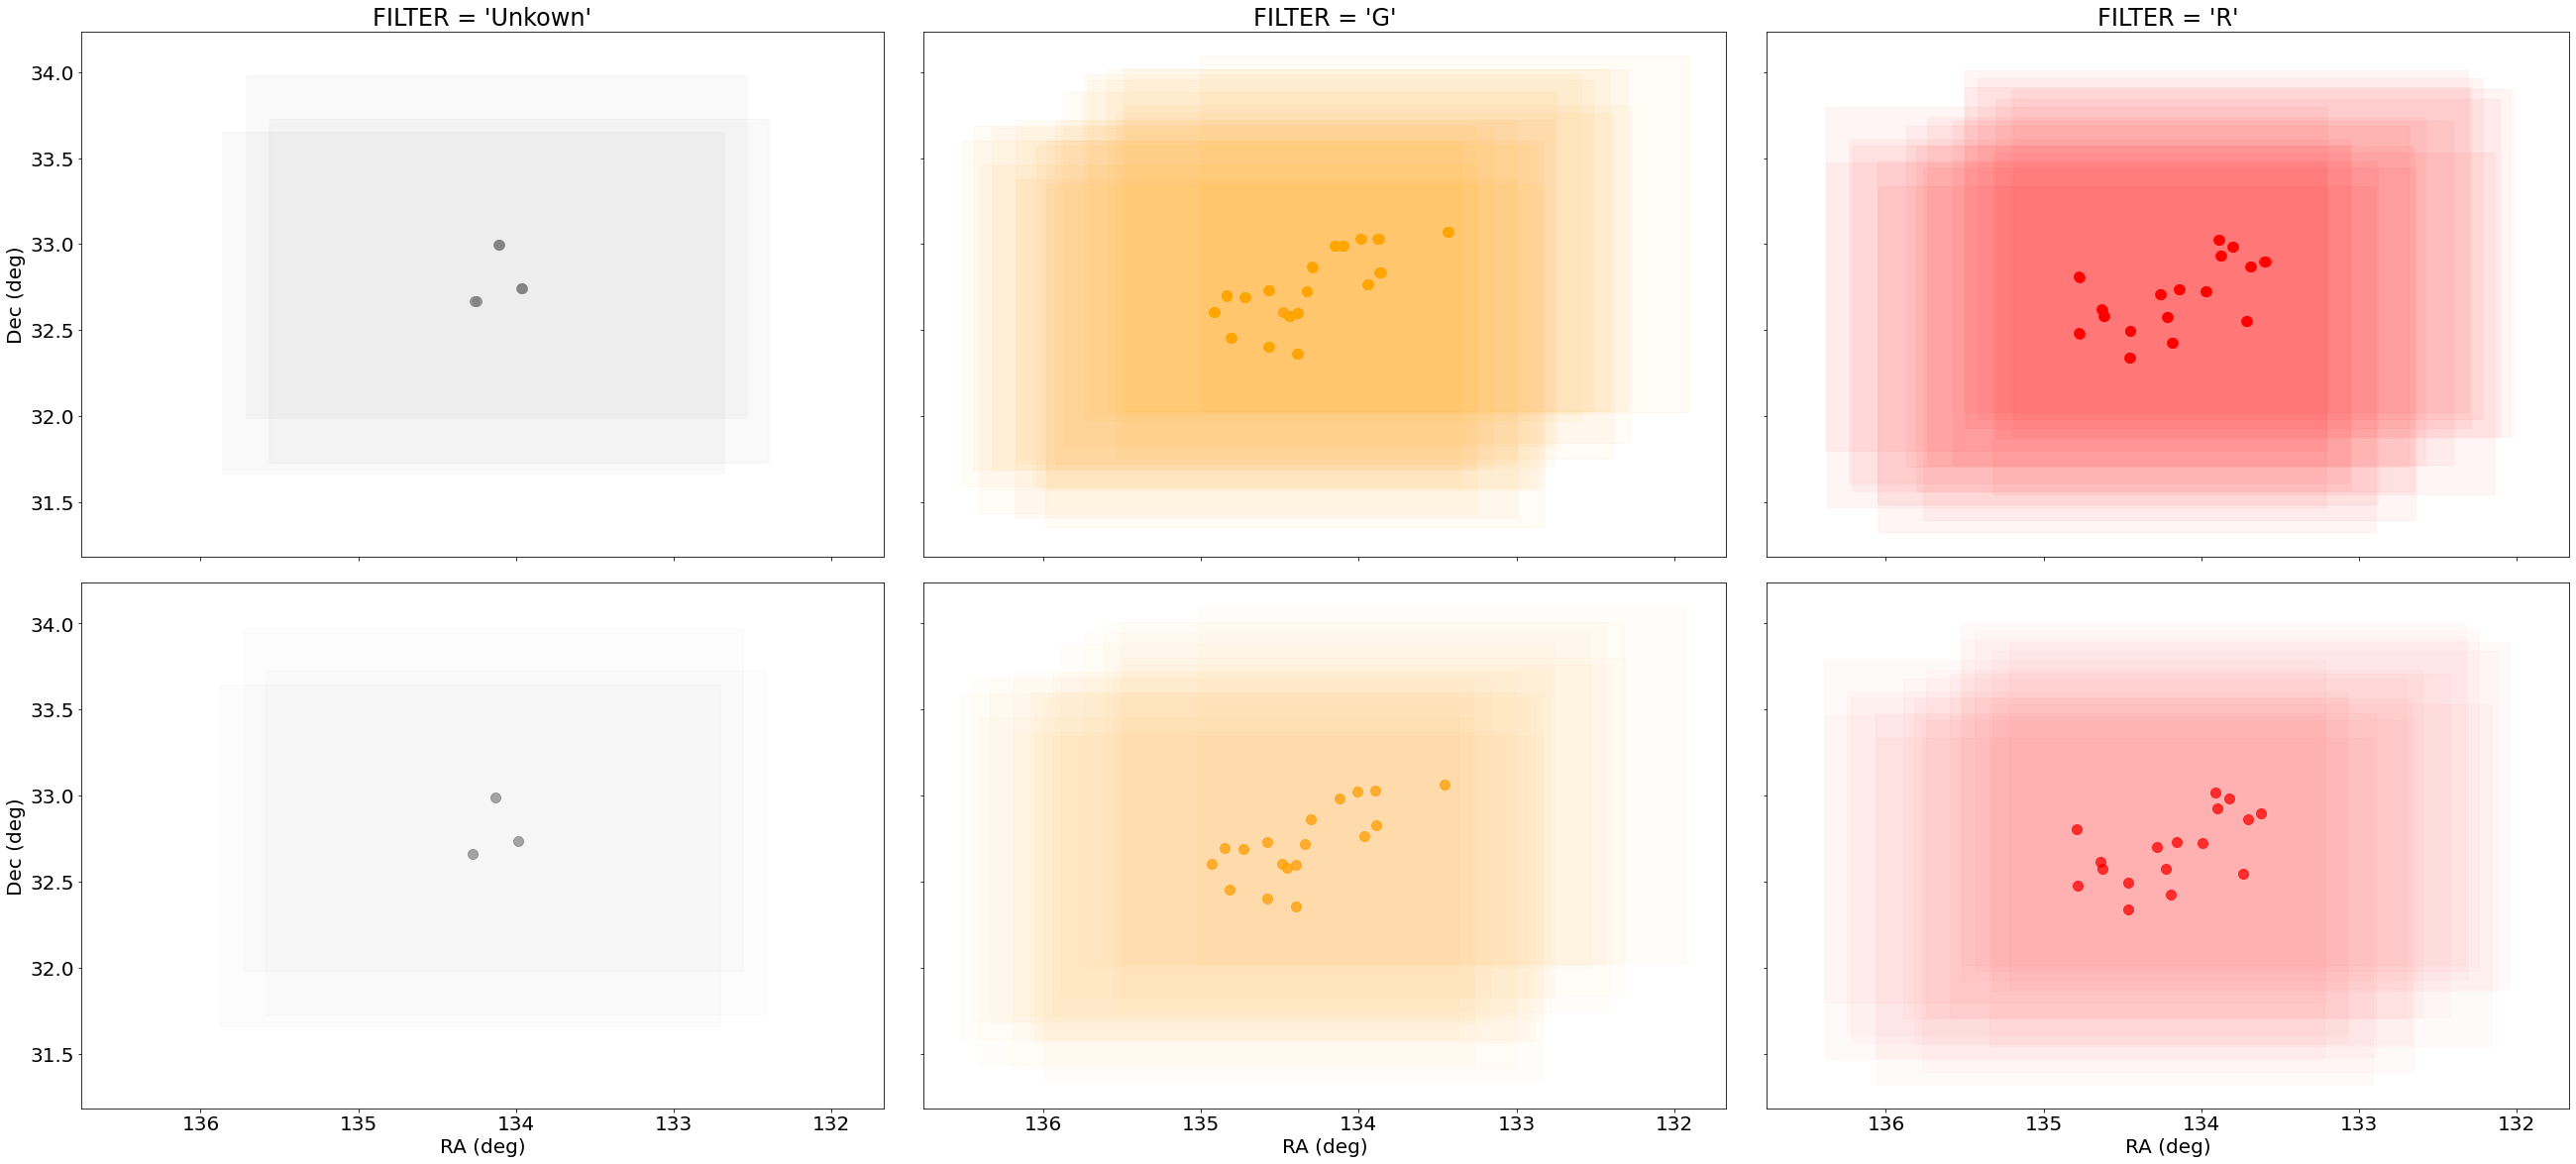

In [144]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (45, 20), sharey = True, sharex = True, gridspec_kw = {'wspace':0.05, 'hspace':0.05})

for i in np.array(others_frames)[np.array(others_reg_RA) == 134.57625]:
    ax1.add_patch(PolygonPatch(i, fc = 'gray', ec = 'gray', alpha = 0.02))
ax1.scatter(np.array(others_RA)[np.array(others_reg_RA) == 134.57625], np.array(others_Dec)[np.array(others_reg_RA) == 134.57625], color = 'gray', label = 'Unknown', s = 100, alpha = 0.7)
# ax1.legend(loc = 'best')
ax1.set_ylabel('Dec (deg)')
ax1.set_title('FILTER = \'Unkown\'')
# ax1.invert_xaxis()

for i in np.array(g_frames)[np.array(g_reg_RA) == 134.57625]:
    ax2.add_patch(PolygonPatch(i, fc = 'orange', ec = 'orange', alpha = 0.02))
ax2.scatter(np.array(g_RA)[np.array(g_reg_RA) == 134.57625], np.array(g_Dec)[np.array(g_reg_RA) == 134.57625], color = 'orange', label = 'G', s = 100, alpha = 0.7)
ax2.set_title('FILTER = \'G\'')
# ax2.set_ylabel('Dec (deg)')
# ax2.invert_xaxis()

for i in np.array(r_frames)[np.array(r_reg_RA) == 134.57625]:
    ax3.add_patch(PolygonPatch(i, fc = 'red', ec = 'red', alpha = 0.02))
ax3.scatter(np.array(r_RA)[np.array(r_reg_RA) == 134.57625], np.array(r_Dec)[np.array(r_reg_RA) == 134.57625], color = 'red', label = 'R', s = 100, alpha = 0.7)
ax3.set_title('FILTER = \'R\'')
# ax3.set_ylabel('Dec (deg)')
# ax3.invert_xaxis()

for i in np.array(others_frames)[np.array(others_reg_RA) == 134.60166666666666]:
    ax4.add_patch(PolygonPatch(i, fc = 'gray', ec = 'gray', alpha = 0.02))
ax4.scatter(np.array(others_RA)[np.array(others_reg_RA) == 134.60166666666666], np.array(others_Dec)[np.array(others_reg_RA) == 134.60166666666666], color = 'gray', label = 'Unknown', s = 100, alpha = 0.7)
ax4.set_xlabel('RA (deg)')
ax4.set_ylabel('Dec (deg)')
# ax4.set_title('FILTER = \'Unkown\'')
ax4.invert_xaxis()

for i in np.array(g_frames)[np.array(g_reg_RA) == 134.60166666666666]:
    ax5.add_patch(PolygonPatch(i, fc = 'orange', ec = 'orange', alpha = 0.02))
ax5.scatter(np.array(g_RA)[np.array(g_reg_RA) == 134.60166666666666], np.array(g_Dec)[np.array(g_reg_RA) == 134.60166666666666], color = 'orange', label = 'G', s = 100, alpha = 0.7)
ax5.set_xlabel('RA (deg)')
# ax5.set_title('FILTER = \'G\'')
ax5.invert_xaxis()

for i in np.array(r_frames)[np.array(r_reg_RA) == 134.60166666666666]:
    ax6.add_patch(PolygonPatch(i, fc = 'red', ec = 'red', alpha = 0.02))
ax6.scatter(np.array(r_RA)[np.array(r_reg_RA) == 134.60166666666666], np.array(r_Dec)[np.array(r_reg_RA) == 134.60166666666666], color = 'red', label = 'R', s = 100, alpha = 0.7)
ax6.set_xlabel('RA (deg)')
# ax6.set_title('FILTER = \'R\'')
ax6.invert_xaxis()


fig.savefig('UW1040_dither+reg.png', bbox_inches = 'tight')